# Basics Linear Algebra

To understand many operation performed on surfaces and profiles a minimum knowledge of vectors and linear algebra is required

## Vectors
Vectors are in fact point in an abstract n-dimensional space. Hence vectors can describe a lot of things: drawing, 3D model for computer graphics, electric signals etc. etc.   Because they are points, we can describe them using different forms, for instance as a ordered sequence of number. A point can be defined in a two dimensional space with a tuple, like (2,3) where the first term, by a convention, indicates the position on the x axis and the second term the position on the y axis. However, many time we define points as vector because we want to specify a set of operations to manipulate these kind of object. In physics usually vector are visualized as arrows but this is actually only a way to visualize them. In this case you could define their lenght (called **modulo** and the angle the **direction** as a tuple but we will use the previous definition at the begining were each number describe the x and y in a cartesian plane.

In [1]:
import matplotlib.pyplot as plt


We call each number **component**. In this case we can acces each component using this notation `a[0]` for the first component _x_ and `a[1]` for the second component _y_ .

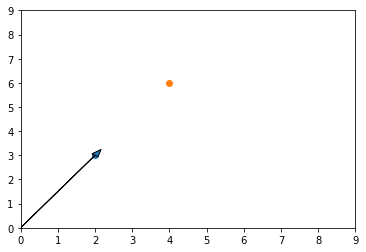

In [3]:
a = (2,3)
plt.scatter(a[0],a[1])
plt.arrow(0,0,a[0],a[1],head_width=0.2)
plt.xlim(0,9)
plt.ylim(0,9)
plt.scatter(a[0]*2,a[1]*2)

Now if we want to define a group of vectors we could write something like this: ((3,4),(5,4),(4,6))
Ploting this would be plot each vector separately:

(0, 13)

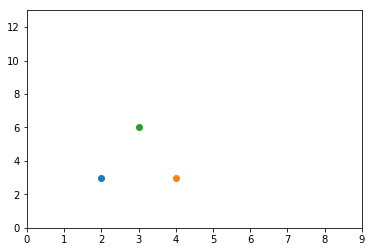

In [4]:
group = ((2,3),(4,3),(3,6))
for i in group:
    plt.scatter(i[0],i[1])
    #plt.arrow(0,0,i[0],i[1],head_width=0.2)

plt.xlim(0,9)
plt.ylim(0,13)

We want to apply the same operation to each vector, for instance the multiplication, we define a variable s = 2 to be used to multiply each vector as we did for the previous example:

(0, 13)

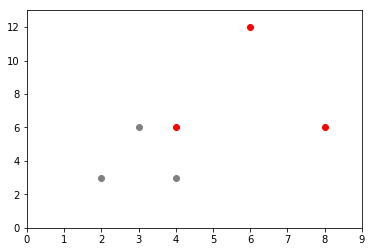

In [5]:
group = ((2,3),(4,3),(3,6))
s = 2
# MULTIPLICATION 
for i in group:
    # we multiply each component of the vectory by the variable s (which is 2)
    plt.scatter(i[0]*s, # This becomes x*s
                i[1]*s, # This becomes y*s
                color='r')
    # we keep as reference also the previous trianlge in grey
    plt.scatter(i[0],i[1],color='gray')
    # plt.arrow(0,0,i[0],i[1],head_width=0.2)

plt.xlim(0,9)
plt.ylim(0,13)

We can notice that mutiplying each component of the group of vectors by a number, we have actually scaled the original triangle making it bigger. We call hence **s** scalar, this is actually the [scalar multiplication](https://en.wikipedia.org/wiki/Scalar_multiplication).  We could perform other operation like translate the tringle addin or subtracting to each component a scalar. Like in this example:

(0, 13)

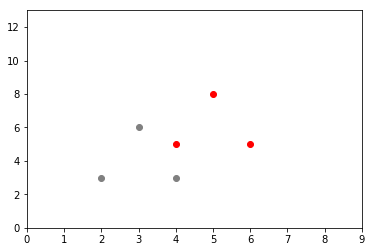

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
s1  = 2
for i in group:
    # we multiply each component of the vectory by the variable s (which is 2)
    plt.scatter(i[0]+s,i[1]+s,color='r')
    # we keep also the previous trianlge
    plt.scatter(i[0],i[1],color='gray')
    #plt.arrow(0,0,i[0],i[1],head_width=0.2)

plt.xlim(0,9)
plt.ylim(0,13)

In [7]:
@interact(sx=(0.0,5), sy=(0.0,5))
def vector_addition(sx,sy):
    for i in group:
        # we ADD TO each component of the vectory the variable sx and st
        plt.scatter(i[0]+sx,i[1]+sy,color='r')
        # we keep also the previous trianlge
        plt.scatter(i[0],i[1],color='gray')
        #plt.arrow(0,0,i[0],i[1],head_width=0.2)

    plt.xlim(0,9)
    plt.ylim(0,13)

interactive(children=(FloatSlider(value=2.5, description='sx', max=5.0), FloatSlider(value=2.5, description='s…

We saw how to scale and translate the triangle now the next problem is how to rotate it. The first thing we have to decide when we rotate an object is the center of rotation. In this case we start rotating the obejct around the origin of the axis (0,0). So first we draw some circles sarting with from the origin and with the radius equal to the distance of the point vector to the origine that we can easily calculate using pythagora.

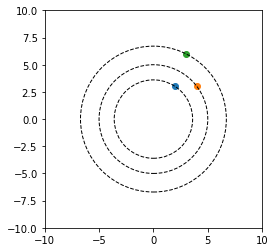

In [36]:
def plot_group(group):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in group:
        r = (i[0]**2+i[1]**2)**0.5 # find the hyptoen our radius using Pythogora therome
        circle = plt.Circle((0, 0), r, fill=False,linestyle='--')
        ax.add_artist(circle)
        ax.scatter(i[0],i[1])


    # change default range so that new circles will work
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    ax.set_aspect('equal')
plot_group(group)

# Digression on goniometric if you need it
So now the problem is how can I move the point along the circles of a precice angle?
Some goniometric basics are needed for understading how to move the point. Let's start with simplest case a single point with y = 0.

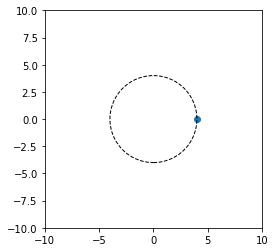

In [37]:
point=[(4,0)]
plot_group(point)

In [38]:
import math
# we define a function to covert radians to angle
def ang2rad(angle):
    return math.pi/180*angle

@interact(alpha=(-90,90))
def move_point_at_angle(alpha):
    r = 4
    new_y = r*math.sin(ang2rad(alpha))
    new_x = r*math.cos(ang2rad(alpha))
    plot_group([(4,0),(new_x,new_y)])
    plt.vlines(x=new_x,ymin=0,ymax=new_y,linestyles='--')
    plt.hlines(y=new_y,xmin=0,xmax=new_x,linestyles='--')

interactive(children=(IntSlider(value=0, description='alpha', max=90, min=-90), Output()), _dom_classes=('widg…

In [45]:
import numpy  as np
alpha = ang2rad(0)
rotmat =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
print(rotmat)

[[ 1. -0.]
 [ 0.  1.]]


In [46]:
rotgroup =[]
for i in group:
    rotgroup.append(np.dot(np.array(i),rotmat))

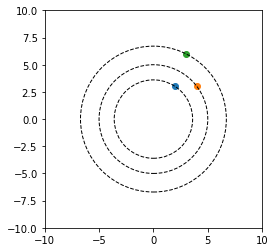

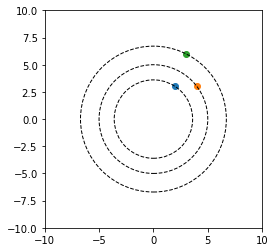

In [47]:
plot_group(rotgroup)
plot_group(group)

In [49]:
@interact(alpha=(-180,180))
def rot(alpha):
    alpha = ang2rad(alpha)
    rotmat =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
    rotgroup =[]
    for i in group:
        rotgroup.append(np.dot(np.array(i),rotmat))
    plot_group(rotgroup)


interactive(children=(IntSlider(value=0, description='alpha', max=180, min=-180), Output()), _dom_classes=('wi…

In [51]:
@interact(alpha=(-180,180))
def rot(alpha):
    alpha = ang2rad(alpha)
    rotmat =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
    rotg = np.dot(np.array(group),rotmat)
    plot_group(rotg)

interactive(children=(IntSlider(value=0, description='alpha', max=180, min=-180), Output()), _dom_classes=('wi…

In [54]:
%timeit np.cos(22)

1.78 µs ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [55]:
%timeit math.cos(22)

141 ns ± 0.432 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
